In this notebook we compute the field of values of preconditioned matrices arising from the discretization of the 1D Helmholtz equation

\begin{equation*}
	-u'' -k^2u = f \text{ in } (0,1)
\end{equation*}
with mixed boundary conditions of the form

\begin{align*}
u(0)&=0\\
u'(1)-iku(1)&=0
\end{align*}

As a preconditioner we use the shifted Laplacian, which results from the discretization of the problem

\begin{equation*}
	-u'' -(k^2+i\epsilon)u = f \text{ in } (0,1)
\end{equation*}
with mixed boundary conditions of the form
\begin{align*}
u(0)&=0\\
u'(1)-iku(1)&=0
\end{align*}


where $\epsilon$ is a real parameter. We discretize the Helmholtz and shifted Laplace problems with P1 finite elements and obtain matrices $A$ and $A_\epsilon$. The preconditioned Helmholtz problem

$AA_{\epsilon}^{-1}x=b$
is then solved with a Krylov subspace method. The following plot shows the spectrum


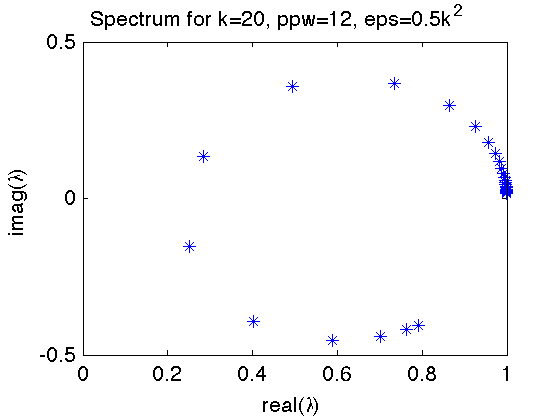

In [12]:
dim = 1;
k   = 20;
ppw = 12;
npc = 4;
eps = 0.5*k^2;
[npf,lev] = fem_npc_to_npf(npc,k,ppw);
A = helmholtzfem(k,npf,0); %Helmholtz matrix
A_eps = helmholtzfem(k,npf,eps); %Shifted Laplace matrix

eigv = eig(full(A_eps\A));

[FV_A, eigA_ASl] = fv(B,1,32);


plot(real(eigv),imag(eigv),'*b','MarkerSize',6);
axis([0 1 -0.5 0.5])
xlabel('real(\lambda)','FontSize',10)
ylabel('imag(\lambda)','FontSize',10)
title('Spectrum for k=20, ppw=12, eps=0.5k^2')




% % 
% % R = fwrestrictionfem(npf,dim);
% % Z = R'; %Prolongation. Deflation subspace: columns of Z
% % dim_def = size(Z,2);
% 
% % Field of values of restricted matrix 
% %To compute the field of values of the restricted matrix
% %(ADEF) we need a basis Y for the orthogonal complement of
% %the columns of Z, i.e., the nullspace of R.
% 
% % Y = null(full(R));
% % 
% % %Restricted matrix
% % Ainvc = (Y'*(A\Y));
% % %Restricted ADEF matrix (only upper block)
% % B     = (Y'*(M\Y))*((Y'*(A\Y))\speye(length(Ainvc))); 
% % [FV_B, eigB] = fv(B,1,32);
% % 
% % %Explicit Deflation operator
% % Q = Z*((Z'*A*Z)\Z');
% %  
% % %Deflated-shifted Operator PadefA
% % PadefA =  M\(A-A*Z*((Z'*A*Z)\Z'*A))+ Z*((Z'*A*Z)\Z'*A);
% % 
% % [U,R] = qr(Z,0);
% % Porth = U*U';
% % 
% % I = eye(length(A));
% % %PadefAcorr = PadefA-Porth*PadefA*(I-Porth);
% % PadefAcorr = (I-Porth)*PadefA + Porth;
% % 
% % %Plots
% % %Field of values of PadefA
% % [FV_PadefA, eigPadefA] = fv(full(PadefA),1,32,1);
% % [FV_PadefAcorr, eigPadefAcorr] = fv(full(PadefAcorr),1,32,1);
% 
% 
% % plot(real(FV_PadefA), imag(FV_PadefA),'b') %Plot the FOV of Padef
% % %plot(real(eigPadefA), imag(eigPadefA), 'r+')    %Plot the eigenvalues too.
% % axis('equal');
% % hold on
% % plot(real(FV_PadefAcorr), imag(FV_PadefAcorr),'k+')  %Plot the FOV of Padefcorr
% % %plot(real(eigPadefAcorr), imag(eigPadefAcorr), 'x')    %Plot the eigenvalues too.
% % plot(real(FV_B),imag(FV_B),'r')               %Plot the field of values of B
% % %plot(real(eigB),imag(eigB), 'k.')    %Plot the eigenvalues too.
% % %plot(0,0,'+k')